### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

/home/nour/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-12-15 15:15:15.399869: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-15 15:15:15.596420: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 15:15:15.596494: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 15:15:15.631785: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS w

### Read the data

In [ ]:
filename = "G-3 Dataset.csv"
data = pd.read_csv(filename)

In [ ]:
data

### Rename the columns

In [ ]:
# Rename the first 6 columns using a list of new names.
new_column_names = [
    "seta1",
    "seta2",
    "seta3",
    "seta4",
    "seta5",
    "seta6",
    "x",
    "y",
    "z",
] + data.columns.tolist()[9:]

# Rename the columns using the new column names.
data.columns = new_column_names

# Print the data with the renamed columns.
print(data.head())

In [ ]:
# Load the updated data into a DataFrame
updated_data = data  # Replace with your updated data

# Save the updated data to a CSV file at a specific path
updated_data.to_csv("./updated_data.csv", index=False)

### Explore the data

In [2]:
data = pd.read_csv("updated_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   seta1   4999 non-null   int64  
 1   seta2   4999 non-null   int64  
 2   seta3   4999 non-null   int64  
 3   seta4   4999 non-null   int64  
 4   seta5   4999 non-null   int64  
 5   seta6   4999 non-null   int64  
 6   x       4999 non-null   float64
 7   y       4999 non-null   float64
 8   z       4999 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 351.6 KB


In [4]:
data.count()

seta1    4999
seta2    4999
seta3    4999
seta4    4999
seta5    4999
seta6    4999
x        4999
y        4999
z        4999
dtype: int64

In [5]:
data.head()

,seta1,seta2,seta3,seta4,seta5,seta6,x,y,z
0,-4,4,-4,4,94,14,14.019125,-7.210704,35.903237
1,-4,4,-4,4,102,0,28.367735,-6.182993,30.408403
2,-4,4,-4,4,102,7,21.452497,-6.660618,29.433028
3,-4,4,-4,4,102,14,14.537259,-7.138243,28.457653
4,-4,4,-4,4,110,0,29.509796,-6.077035,25.018323


In [6]:
data.describe()

,seta1,seta2,seta3,seta4,seta5,seta6,x,y,z
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,1.338668,2.233247,0.359272,0.072815,90.000800,7.001400,22.528004,-0.488662,34.696703
std,3.769723,12.951815,13.755153,13.658775,13.670214,5.716333,10.542358,12.834551,14.979783
min,-4.000000,-20.000000,-20.000000,-20.000000,70.000000,0.000000,-0.966933,-33.737636,-0.518318
25%,-4.000000,-12.000000,-12.000000,-12.000000,78.000000,0.000000,14.878777,-10.038857,23.235761
50%,4.000000,4.000000,4.000000,4.000000,94.000000,7.000000,22.052636,-0.252049,35.186810
75%,4.000000,12.000000,12.000000,12.000000,102.000000,14.000000,29.940865,8.948069,46.299379
max,4.000000,20.000000,20.000000,20.000000,110.000000,14.000000,54.272042,33.737636,68.176186


### Train the model

In [7]:
# Split the data into training and testing sets
X = data[["x", "y", "z"]]
y = data[["seta1", "seta2", "seta3", "seta4", "seta5", "seta6"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### MLPRegressor

In [11]:
# Create an MLPRegressor model
model = MLPRegressor(
    hidden_layer_sizes=(256, 128),
    activation="relu",
    solver="adam",
    alpha=0.0001,
    max_iter=1000,
    verbose=True,
)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
mlp_regressor_pred = model.predict(X_test)
mlp_regressor_train_pred = model.predict(X_train)

Iteration 1, loss = 359.39580628
Iteration 2, loss = 153.40434385
Iteration 3, loss = 120.19039161
Iteration 4, loss = 107.25446478
Iteration 5, loss = 100.13101339
Iteration 6, loss = 95.07370796
Iteration 7, loss = 91.69767299
Iteration 8, loss = 89.32053652
Iteration 9, loss = 86.92847832
Iteration 10, loss = 84.94801233
Iteration 11, loss = 82.22727761
Iteration 12, loss = 78.99899644
Iteration 13, loss = 75.19467222
Iteration 14, loss = 70.54555448
Iteration 15, loss = 65.14576651
Iteration 16, loss = 58.99821796
Iteration 17, loss = 52.47205469
Iteration 18, loss = 46.29054605
Iteration 19, loss = 41.14453620
Iteration 20, loss = 35.41202614
Iteration 21, loss = 31.63521999
Iteration 22, loss = 28.99360680
Iteration 23, loss = 27.26103322
Iteration 24, loss = 26.15482166
Iteration 25, loss = 25.36015742
Iteration 26, loss = 25.08491866
Iteration 27, loss = 25.00324522
Iteration 28, loss = 25.04844421
Iteration 29, loss = 25.07777964
Iteration 30, loss = 24.87374530
Iteration 31, 

#### Tensorflow

In [9]:
# Build the Keras model
model = keras.models.Sequential(
    [
        layers.Dense(256, activation="relu", input_shape=(3,)),
        layers.Dense(128, activation="relu"),
        layers.Dense(6),
    ]
)

# Define the optimizer and loss function
model.compile(loss="mse", optimizer="adam")

# Train the model
model.fit(
    X_train,
    y_train,
    epochs=100,
)

# Evaluate the model
model.evaluate(X_test, y_test)

# Save the model
model.save("tf_model.h5")

# Make predictions with the trained model
tf_y_pred = model.predict(X_test)
tf_train_pred = model.predict(X_train)

Epoch 1/100
125/125 [==============================] - 0s 931us/step - loss: 345.5900
Epoch 2/100
125/125 [==============================] - 0s 704us/step - loss: 188.6081
Epoch 3/100
125/125 [==============================] - 0s 790us/step - loss: 165.0473
Epoch 4/100
125/125 [==============================] - 0s 782us/step - loss: 140.0852
Epoch 5/100
125/125 [==============================] - 0s 848us/step - loss: 103.7985
Epoch 6/100
125/125 [==============================] - 0s 825us/step - loss: 68.6781
Epoch 7/100
125/125 [==============================] - 0s 806us/step - loss: 53.8274
Epoch 8/100
125/125 [==============================] - 0s 688us/step - loss: 52.1484
Epoch 9/100
125/125 [==============================] - 0s 790us/step - loss: 50.6215
Epoch 10/100
125/125 [==============================] - 0s 832us/step - loss: 50.7037
Epoch 11/100
125/125 [==============================] - 0s 783us/step - loss: 50.1889
Epoch 12/100
125/125 [==============================] - 0s

/home/nour/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


125/125 [==============================] - 0s 444us/step


### Evaluate the model

#### MLPRegressor

In [12]:
train_r2 = metrics.r2_score(y_train, mlp_regressor_train_pred)
test_r2 = metrics.r2_score(y_test, mlp_regressor_pred)
train_mse = metrics.mean_squared_error(y_train, mlp_regressor_train_pred)
test_mse = metrics.mean_squared_error(y_test, mlp_regressor_pred)

In [13]:
print("Train R2:", train_r2)
print("Test R2:", test_r2)
print()
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train R2: 0.5463879840036024
Test R2: 0.526556440587184

Train MSE: 47.0656470992373
Test MSE: 49.922327592865344


#### Tensorflow

In [15]:
r2 = tf.keras.metrics.R2Score()
r2.update_state(y_train, tf_train_pred)
print("Train R2 score:", r2.result().numpy())
r2 = tf.keras.metrics.R2Score()
r2.update_state(y_test, tf_y_pred)
print("Test R2 score: ", r2.result().numpy())

print()

mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(y_train, tf_train_pred)
print("Train MSE:", mse.result().numpy())
mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(y_test, tf_y_pred)
print("Test MSE:", mse.result().numpy())

Train R2 score: 0.55730253
Test R2 score:  0.53388625

Train MSE: 45.79093
Test MSE: 48.741272


### Visualize the results

In [16]:
# Extract each joint's real values
setas_real = []
for i in range(6):
    setas_real.append(y_test.values[:, i])

# Extract the predicted values for each joint
tf_setas_pred = []
for i in range(6):
    tf_setas_pred.append(tf_y_pred[:, i])

# Extract the predicted values for each joint
mlp_regressor_setas_pred = []
for i in range(6):
    mlp_regressor_setas_pred.append(mlp_regressor_pred[:, i])

In [17]:
models_names = ["MLPRegressor", "TensorFlow"]
models_preds = [mlp_regressor_setas_pred, tf_setas_pred]

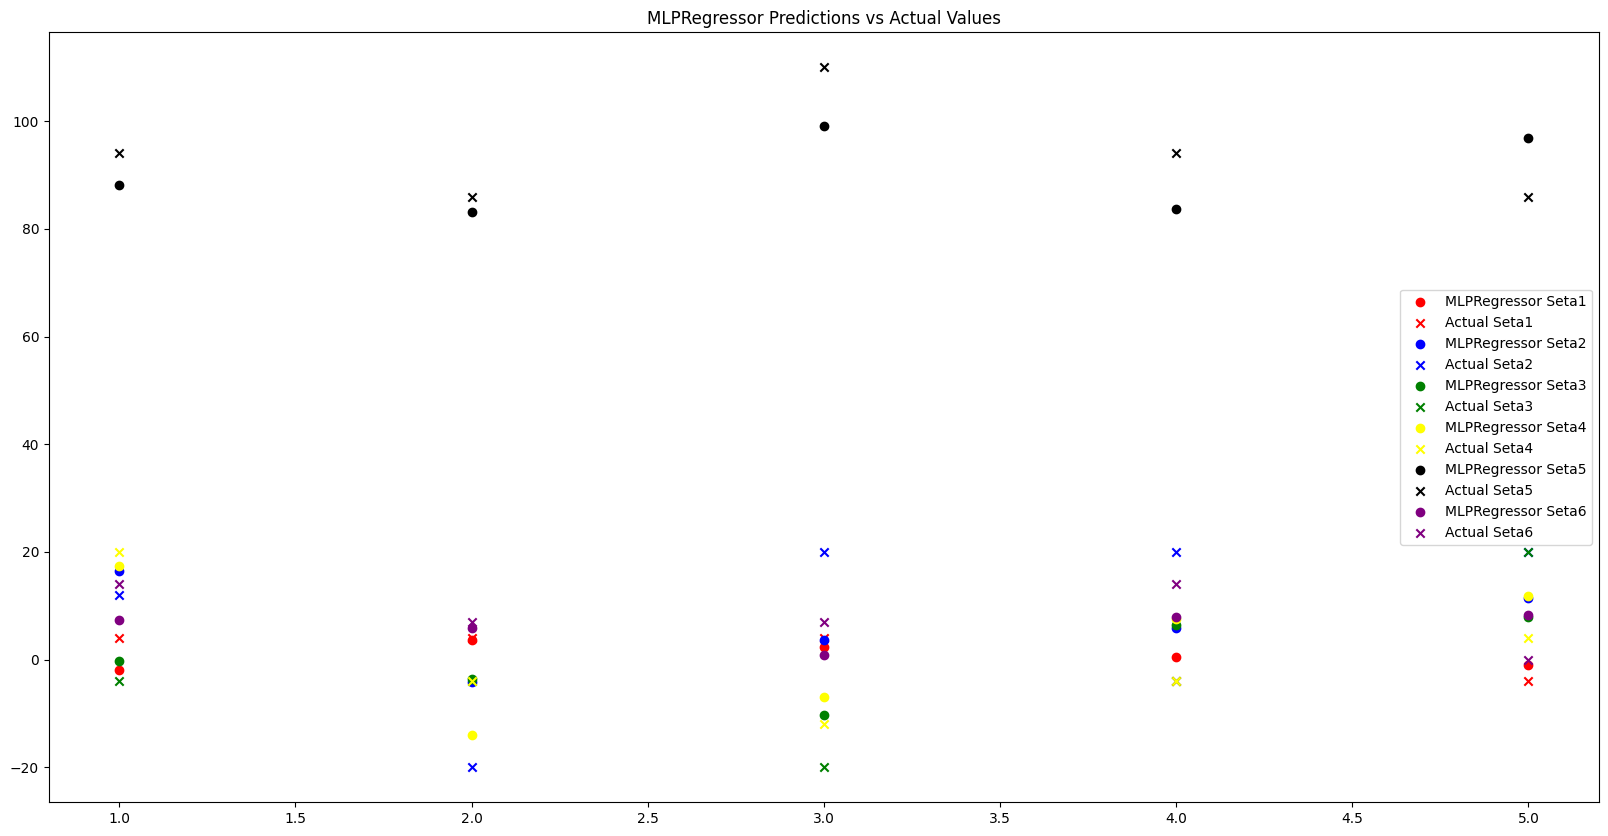

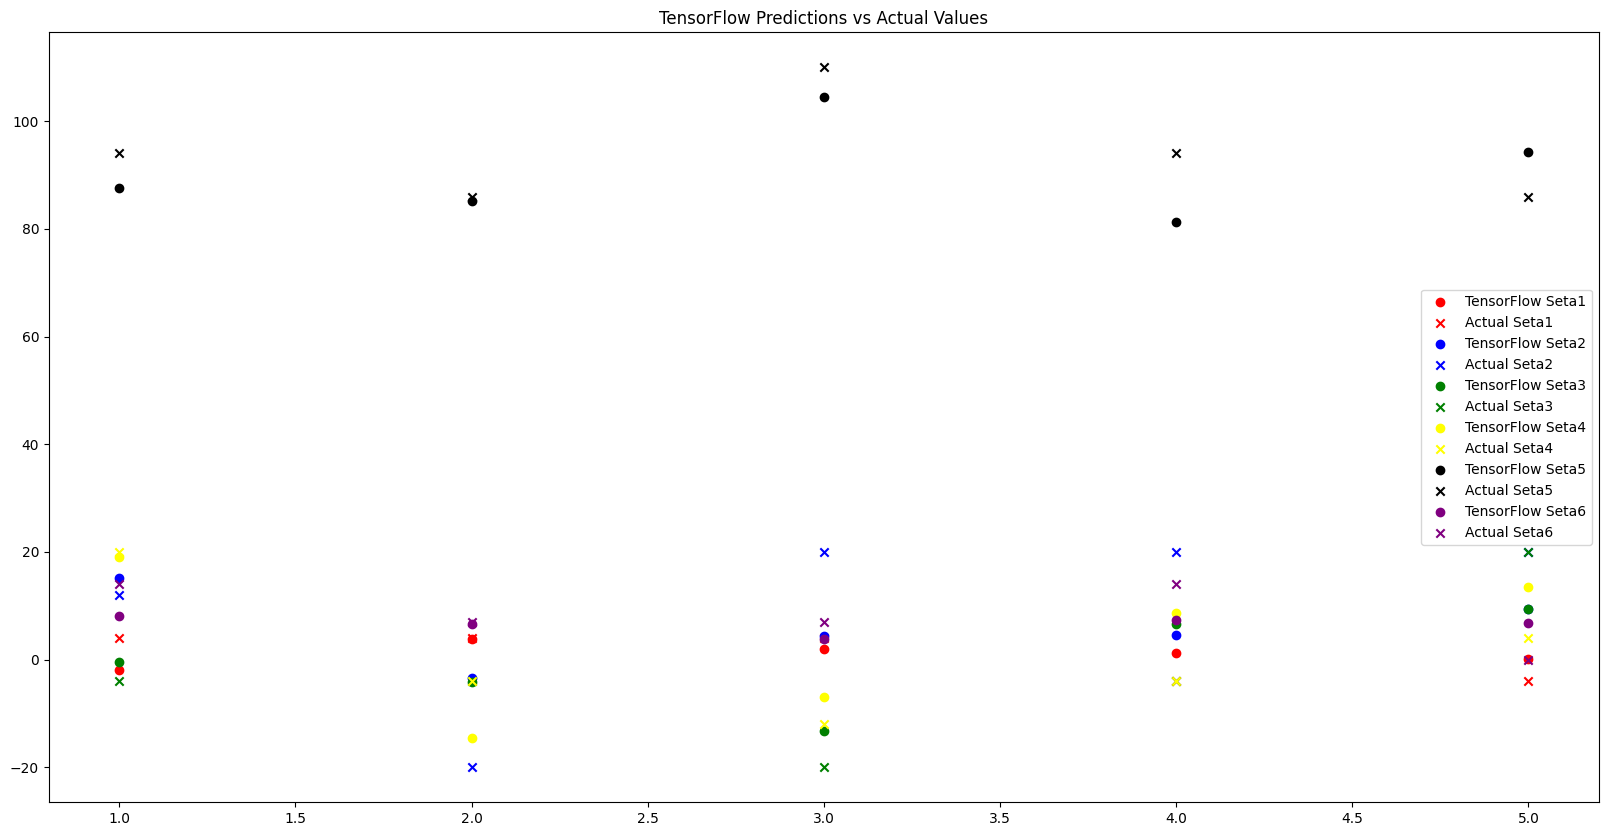

In [30]:
# Visualize the predictions and the actual values of each model
num_of_samples = 5
colors = ["red", "blue", "green", "yellow", "black", "purple"]

for i in range(2):
    plt.figure(figsize=(20, 10))

    # Each seta
    for j in range(6):
        plt.scatter(
            x=range(1,num_of_samples+1),
            y=models_preds[i][j][:num_of_samples],
            label=models_names[i] + " Seta" + str(j + 1),
            marker="o",
            color=colors[j],
        )
        plt.scatter(
            x=range(1,num_of_samples+1),
            y=setas_real[j][:num_of_samples],
            label="Actual Seta" + str(j + 1),
            marker="x",
            color=colors[j],
        )

    plt.title(models_names[i] + " Predictions vs Actual Values")
    plt.legend()
    plt.show()

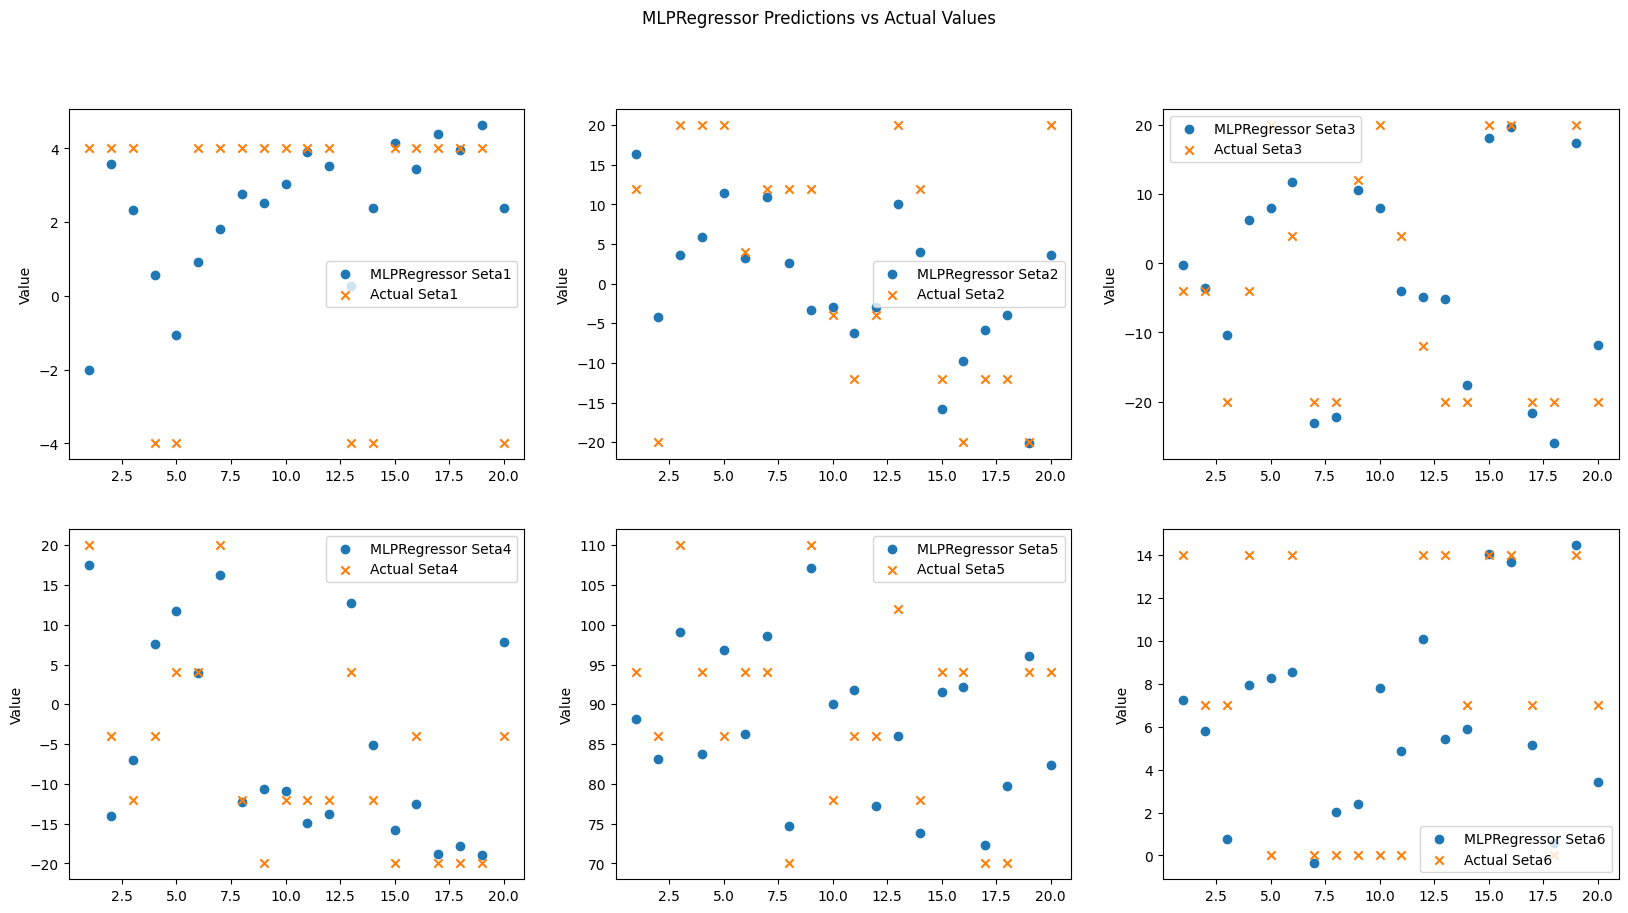

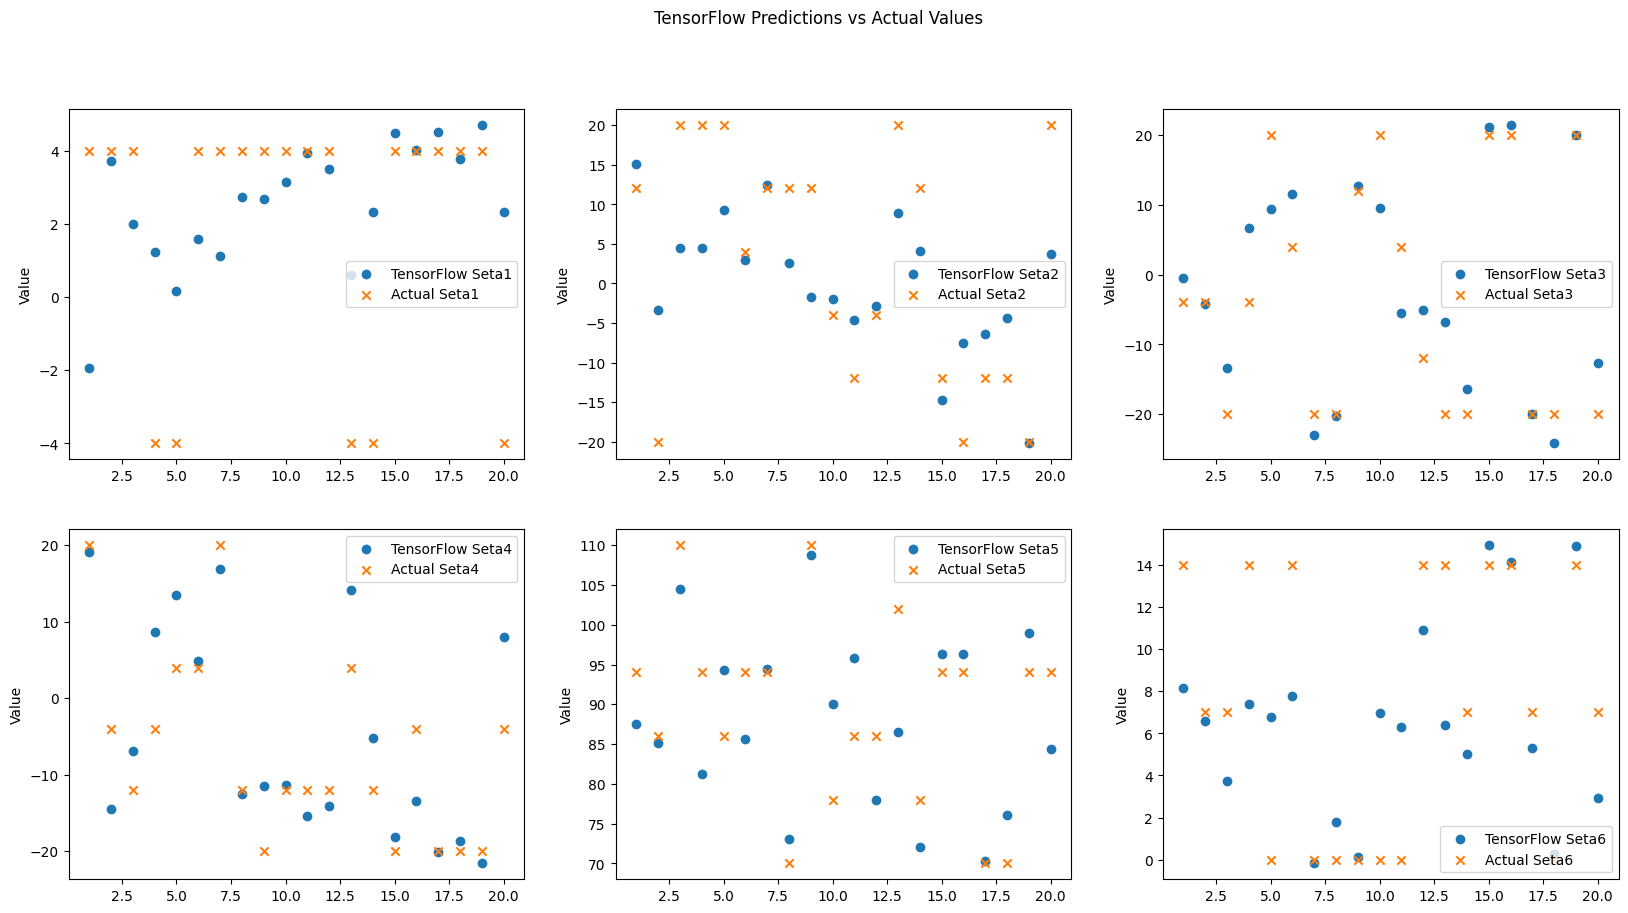

In [27]:
# Visualize each join in a subfigure for each model
num_of_samples = 20

for i in range(2):
    plt.figure(figsize=(20, 10))
    for j in range(6):
        plt.subplot(2, 3, j + 1)
        plt.scatter(
            x=range(1,num_of_samples+1),
            y=models_preds[i][j][:num_of_samples],
            label=models_names[i] + " Seta" + str(j + 1),
            marker="o",
        )
        plt.scatter(
            x=range(1,num_of_samples+1),
            y=setas_real[j][:num_of_samples],
            label="Actual Seta" + str(j + 1),
            marker="x",
        )
        plt.ylabel("Value")
        plt.legend()
    plt.suptitle(models_names[i] + " Predictions vs Actual Values")
    plt.show()